This notebook explores the environmental time series data in relation to extreme events.
The goal is to better understand trends, variability, and basic statistics in python.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dates = pd.date_range("2010-01-01", periods=200)
rainfall = np.random.gamma(shape=2, scale=3, size=200)

dataframe = pd.DataFrame ({
    "date": dates,
    "rainfall_mm": rainfall
})

dataframe.head()

,date,rainfall_mm
0,2010-01-01,3.190191
1,2010-01-02,10.525637
2,2010-01-03,5.290814
3,2010-01-04,9.540348
4,2010-01-05,4.850607


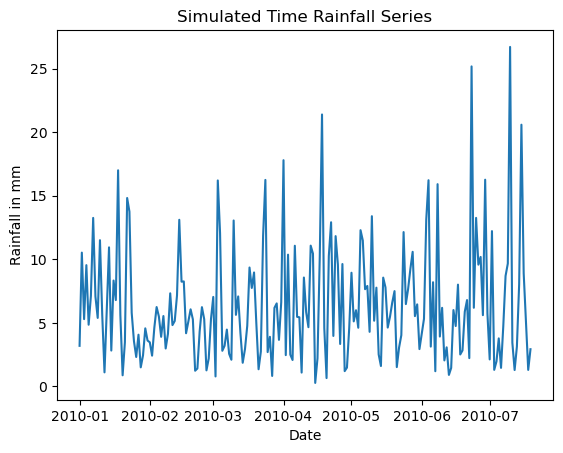

In [6]:
plt.figure()
plt.plot(dataframe["date"], dataframe["rainfall_mm"])
plt.title("Simulated Time Rainfall Series")
plt.xlabel("Date")
plt.ylabel("Rainfall in mm")
plt.show()

I begin by computing basic statistics to understand the distribution and variability of the rainfall values.

In [7]:
dataframe["rainfall_mm"].describe()

count    200.000000
mean       6.433987
std        4.598842
min        0.270728
25%        3.066660
50%        5.412413
75%        8.559542
max       26.713831
Name: rainfall_mm, dtype: float64

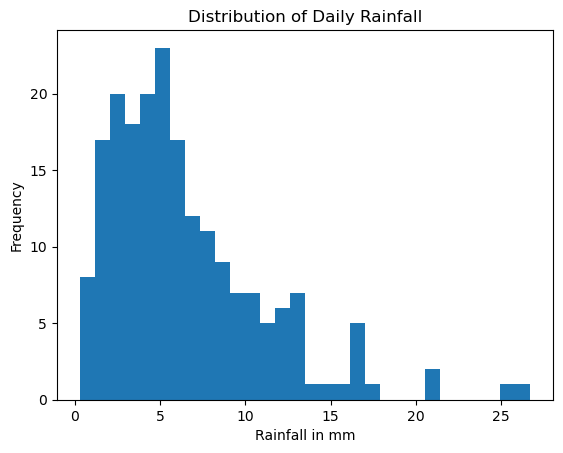

In [8]:
plt.figure()
plt.hist(dataframe["rainfall_mm"], bins=30)
plt.xlabel("Rainfall in mm")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Rainfall")
plt.show()

Extreme rainfall events are defined as rainfall above the 95th percentile of the rainfall distribution.

In [9]:
threshold = dataframe["rainfall_mm"].quantile(0.95)
threshold

dataframe["is_extreme"] = dataframe["rainfall_mm"] > threshold
dataframe[dataframe["is_extreme"]].head()
dataframe["is_extreme"].value_counts()


is_extreme
False    190
True      10
Name: count, dtype: int64

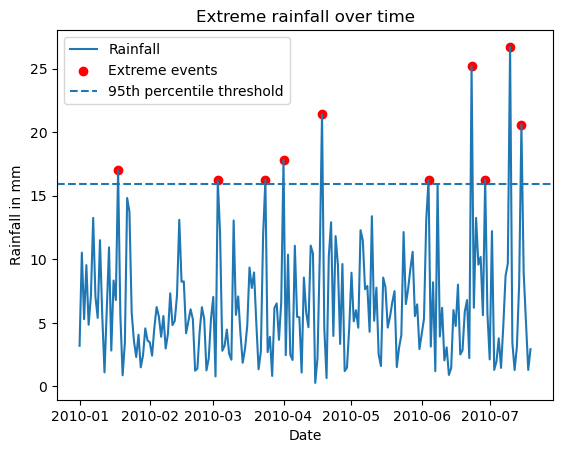

In [10]:
plt.figure()
plt.plot(dataframe["date"], dataframe["rainfall_mm"], label="Rainfall")

plt.scatter(
    dataframe.loc[dataframe["is_extreme"], "date"],
    dataframe.loc[dataframe["is_extreme"], "rainfall_mm"],
    color="red",
    label="Extreme events"
    )
plt.axhline(threshold, linestyle="--", label="95th percentile threshold")

plt.legend()
plt.xlabel("Date")
plt.ylabel("Rainfall in mm")
plt.title("Extreme rainfall over time")
plt.show()

I compute rolling averages to smooth out the rainfall time series and identify periods of potential droughts (low rainfall) using a threshold based on the 5th percentile.

In [11]:
dataframe["rainfall_7day_avg"] = dataframe["rainfall_mm"].rolling(window=7).mean()
dataframe[["date", "rainfall_mm", "rainfall_7day_avg"]].head(15)

,date,rainfall_mm,rainfall_7day_avg
0,2010-01-01,3.190191,NaN
1,2010-01-02,10.525637,NaN
2,2010-01-03,5.290814,NaN
3,2010-01-04,9.540348,NaN
4,2010-01-05,4.850607,NaN
5,2010-01-06,7.116833,NaN
6,2010-01-07,13.257599,7.681718
7,2010-01-08,7.072858,8.236385
8,2010-01-09,5.387281,7.502335
9,2010-01-10,11.503603,8.389876


In [12]:
drought_threshold = dataframe["rainfall_7day_avg"].quantile(0.05)
dataframe["is_drought"] = dataframe["rainfall_7day_avg"] < drought_threshold
dataframe[dataframe["is_drought"]].head()

,date,rainfall_mm,is_extreme,rainfall_7day_avg,is_drought
29,2010-01-30,4.564640,False,3.460987,True
30,2010-01-31,3.606400,False,3.149479,True
31,2010-02-01,3.467066,False,3.136342,True
32,2010-02-02,2.417344,False,3.151341,True
33,2010-02-03,4.626175,False,3.231324,True


In [13]:
dataframe["is_drought"].value_counts()

is_drought
False    190
True      10
Name: count, dtype: int64

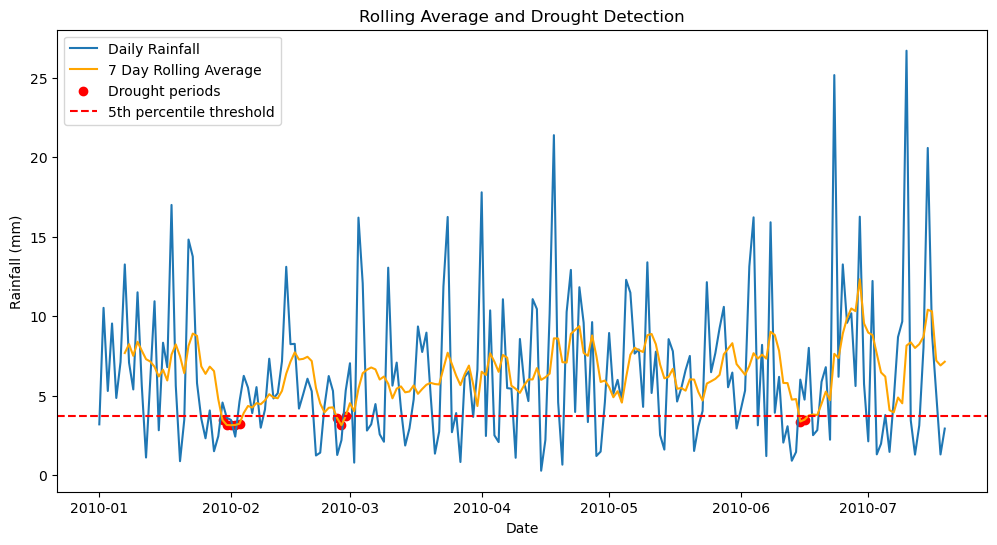

In [14]:
plt.figure(figsize=[12,6])
plt.plot(dataframe["date"], dataframe["rainfall_mm"], label="Daily Rainfall")
plt.plot(dataframe["date"], dataframe["rainfall_7day_avg"], color="orange", label="7 Day Rolling Average")

plt.scatter(
    dataframe.loc[dataframe["is_drought"], "date"],
    dataframe.loc[dataframe["is_drought"], "rainfall_7day_avg"],
    color="red",
    label="Drought periods"
)

plt.axhline(drought_threshold, linestyle="--", color="red", label="5th percentile threshold")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.title("Rolling Average and Drought Detection")
plt.legend()
plt.show()

A drought is defined as a day where the 7 day rolling average of rainfall falls below the 5th percentile of the historic rolling average. This approach smooths out individual variability and highlights sustained periods of little rainfall.

In [15]:
dataframe[["rainfall_mm", "rainfall_7day_avg"]].describe()

,rainfall_mm,rainfall_7day_avg
count,200.000000,194.000000
mean,6.433987,6.442571
std,4.598842,1.694161
min,0.270728,3.135557
25%,3.066660,5.282286
50%,5.412413,6.375097
75%,8.559542,7.578450
max,26.713831,12.322572


In [ ]:
num_drought_days = dataframe["is_drought"].sum()
percentage_drought = (num_drought_days / len(dataframe)) * 100
print(
    "days: " + str(num_drought_days), 
    "percentage drought: " + str(percentage_drought)
    )

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3208478200.py, line 5)

The dataset contains 